In [189]:
#importng libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [190]:
#calling for dataset
df= pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,4/5/2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,4/2/2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,5/10/2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [191]:
# 3 different data types exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [192]:
#also few columns have null values 
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# **Data cleaning**

In [193]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

### **PRT_ID**

In [194]:
#as the part id has no direct effect on the sale price of the house, delete teh column
df.drop("PRT_ID", axis=1, inplace=True)

### **AREA**

In [195]:
#considering the Area column
#the data in the column has values with spelling mistakes 
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [196]:
df.loc[df["AREA"] == "Karapakam", "AREA"] = "Karapakkam"

In [197]:
df.loc[df["AREA"] == "Ana Nagar", "AREA"] = "Anna Nagar"

In [198]:
df.loc[df["AREA"] == "Ann Nagar", "AREA"] = "Anna Nagar"

In [199]:
df.loc[df["AREA"] == "Adyr", "AREA"] = "Adyar"

In [200]:
df.loc[df["AREA"] == "Velchery", "AREA"] = "Velachery"

In [201]:
df.loc[df["AREA"] == "Chrompet", "AREA"] = "Chromepet"

In [202]:
df.loc[df["AREA"] == "Chrmpet", "AREA"] = "Chromepet"

In [203]:
df.loc[df["AREA"] == "Chrompt", "AREA"] = "Chromepet"

In [204]:
df.loc[df["AREA"] == "Chormpet", "AREA"] = "Chromepet"

In [205]:
df.loc[df["AREA"] == "chromepet", "AREA"] = "Chromepet"

In [206]:
df.loc[df["AREA"] == "KK Nagar", "AREA"] = "K.K. Nagar"

In [207]:
df.loc[df["AREA"] == "KKNagar", "AREA"] = "K.K. Nagar"

In [208]:
df.loc[df["AREA"] == "TNagar", "AREA"] = "T. Nagar"

In [209]:
df.loc[df["AREA"] == "T Nagar", "AREA"] = "T. Nagar"

In [210]:
#data is clean from spelling mistakes
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'K.K. Nagar', 'T. Nagar'], dtype=object)

In [211]:
#no null values present
df.AREA.isnull().sum()

0

### **INT_SQFT**

In [212]:
#no possible outliers
df["INT_SQFT"].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [213]:
#no null values 
df.INT_SQFT.isnull().sum()

0

In [214]:
df["INT_SQFT"]= df["INT_SQFT"].astype(float)

### **DATE_SALE and DATE_BUILD**

In [215]:
#dates column
# if we substract the sale date from the build date we can get the age of the house which can be studied for its effect on price rate change.

df.DATE_SALE[:5]

#as the dtype here is object, pandas will consider the date as string.
#converting object dtype to datetime dtype

0      4/5/2011
1    19-12-2006
2      4/2/2012
3    13-03-2010
4     5/10/2009
Name: DATE_SALE, dtype: object

In [216]:
df["DATE_SALE"] = pd.to_datetime(df["DATE_SALE"])
df["DATE_SALE"]=df["DATE_SALE"].dt.year

In [217]:
df["DATE_BUILD"] = pd.to_datetime(df["DATE_BUILD"])
df["DATE_BUILD"]=df["DATE_BUILD"].dt.year

In [218]:
Age= (df["DATE_SALE"] - df["DATE_BUILD"])
Age

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Length: 7109, dtype: int64

In [219]:
df.drop("DATE_SALE",axis=1, inplace=True)

In [220]:
df.drop("DATE_BUILD",axis=1, inplace=True)

In [221]:
df.insert(2, "Age", Age, True)

### **DIST_MAINROAD**

In [222]:
#no possible outliers
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [223]:
#no null values present
df.DIST_MAINROAD.isnull().sum()

0

### **N_BEDROOM**

In [224]:
#it is possible that there are 4 bedrooms in a house. no outliers
df.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [225]:
#there is 1 null value which needs to be replaced
df.N_BEDROOM.isnull().sum()

1

In [226]:
#mode is considered as mean will provide a fractional value and no of berooms cannot be fractional
m=df['N_BEDROOM'].mode()[0]
m

1.0

In [227]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(m)

In [228]:
df.N_BEDROOM.isnull().sum()

0

In [229]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)

### **N_BATHROOM**

In [230]:
#no outliers present
df.N_BATHROOM.describe()

count    7104.000000
mean        1.213260
std         0.409639
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [231]:
#null values need to be removed
df.N_BATHROOM.isnull().sum()

5

In [232]:
#mode is considered as mean will provide a fractional value and no of bathrooms cannot be fractional
m=df['N_BATHROOM'].mode()[0]
m

1.0

In [233]:
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(m)

In [234]:
df.N_BATHROOM.isnull().sum()

0

In [235]:
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

### **N_ROOM**

In [236]:
#no possible outliers found
df.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [237]:
#no null values
df.N_ROOM.isnull().sum()

0

In [238]:
df['N_ROOM'] = df['N_ROOM'].astype(int)

### **SALE_COND**

In [239]:
#SALE_COND

df.SALE_COND.unique()

#there are spelling mistakes in the given column 

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [240]:
df.loc[df["SALE_COND"] == "AbNormal", "SALE_COND"] = "Abnormal"

In [241]:
df.loc[df["SALE_COND"] == "Ab Normal", "SALE_COND"] = "Abnormal"

In [242]:
df.loc[df["SALE_COND"] == "PartiaLl", "SALE_COND"] = "Partial"

In [243]:
df.loc[df["SALE_COND"] == "Partiall", "SALE_COND"] = "Partial"

In [244]:
df.loc[df["SALE_COND"] == "Adj Land", "SALE_COND"] = "AdjLand"

In [245]:
df.SALE_COND.unique()

#data is clean of spellng errors 

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [246]:
#no null values
df.SALE_COND.isnull().sum()

0

### **PARK_FACIL**

In [247]:
#'PARK_FACIL 

df.PARK_FACIL.unique()

#there is a spelling mistake 

array(['Yes', 'No', 'Noo'], dtype=object)

In [248]:
df.loc[df["PARK_FACIL"] == "Noo", "PARK_FACIL"] = "No"

In [249]:
df.PARK_FACIL.unique()

#data is clean of spellng errors

array(['Yes', 'No'], dtype=object)

In [250]:
#no null values
df.PARK_FACIL.isnull().sum()

0

### **BUILDTYPE**

In [251]:
df.BUILDTYPE.describe()

count      7109
unique        5
top       House
freq       2444
Name: BUILDTYPE, dtype: object

In [252]:
#BUILDTYPE

df.BUILDTYPE.unique()

#there is a spelling mistake 

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [253]:
df.loc[df["BUILDTYPE"] == "Comercial", "BUILDTYPE"] = "Commercial"

In [254]:
df.loc[df["BUILDTYPE"] == "Others", "BUILDTYPE"] = "Other"

In [255]:
df.BUILDTYPE.unique()

#data is clean of spellng errors

array(['Commercial', 'Other', 'House'], dtype=object)

In [256]:
#no null values present
df.BUILDTYPE.isnull().sum()

0

### **UTILITY_AVAIL**

In [257]:
df.UTILITY_AVAIL.describe()

count       7109
unique         5
top       AllPub
freq        1886
Name: UTILITY_AVAIL, dtype: object

In [258]:
#UTILITY_AVAIL

df.UTILITY_AVAIL.unique()

#Spellng errors can be seen 

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [259]:
df.loc[df["UTILITY_AVAIL"] == "AllPub", "UTILITY_AVAIL"] = "All Pub"

In [260]:
df.UTILITY_AVAIL.unique()
# data clean of spelling errors 

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [261]:
#no null values
df.UTILITY_AVAIL.isnull().sum()

0

### **STREET**

In [262]:
df.STREET.describe()

count      7109
unique        5
top       Paved
freq       2560
Name: STREET, dtype: object

In [263]:
#STREET

df.STREET.unique()

# spelling errors to be removed

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [264]:
df.loc[df["STREET"] == "Pavd", "STREET"] = "Paved"

In [265]:
df.loc[df["STREET"] == "NoAccess", "STREET"] = "No Access"

In [266]:
df.STREET.unique()

#data is clean of spelling errors

array(['Paved', 'Gravel', 'No Access'], dtype=object)

### **MZZONE**

In [267]:
df.MZZONE.describe()

count     7109
unique       6
top         RL
freq      1858
Name: MZZONE, dtype: object

In [268]:
#no null values
df.MZZONE.isnull().sum()

0

### **QS_ROOMS**

In [269]:
#no otliers
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

In [270]:
#no null values
df.QS_ROOMS.isnull().sum()

0

### **QS_BATHROOM**

In [271]:
#no outliers
df.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

In [272]:
#no null values
df.QS_BATHROOM.isnull().sum()

0

### **QS_BEDROOM**

In [273]:
#no outliers
df.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

In [274]:
df.QS_BEDROOM.isnull().sum()

0

### **QS_OVERALL**

In [275]:
#no outliers
df.QS_OVERALL.describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [276]:
df.QS_OVERALL.isnull().sum()

48

In [277]:
m=df.QS_OVERALL.mean()
m

3.5032537884152344

In [278]:
df['QS_OVERALL'].fillna(m, inplace=True)

In [279]:
df.QS_OVERALL.isnull().sum()

0

### **REG_FEE and COMMIS**

In [280]:
#These two columns are no relevent to the prediction of sales price so delete the columns

df.drop(["REG_FEE","COMMIS"], axis=1, inplace=True)

In [281]:
df.columns

Index(['AREA', 'INT_SQFT', 'Age', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

### **SALES_PRICE**

In [282]:
#no outliers
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [283]:
#no null values
df.SALES_PRICE.isnull().sum()

0

In [284]:
df.head()

,AREA,INT_SQFT,Age,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004.0,44,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986.0,11,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909.0,20,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855.0,22,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226.0,30,84,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250


# **Exploratory Data Analysis**

In [285]:
df['AREA'].dtype

dtype('O')

In [286]:
cat=[]
num=[]
for i in df.columns:
  x=df[f"{i}"].dtype
  if x=="O":
    cat.append(i)
  else:
    num.append(i)

In [287]:
cat

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

### **Categorical columns**

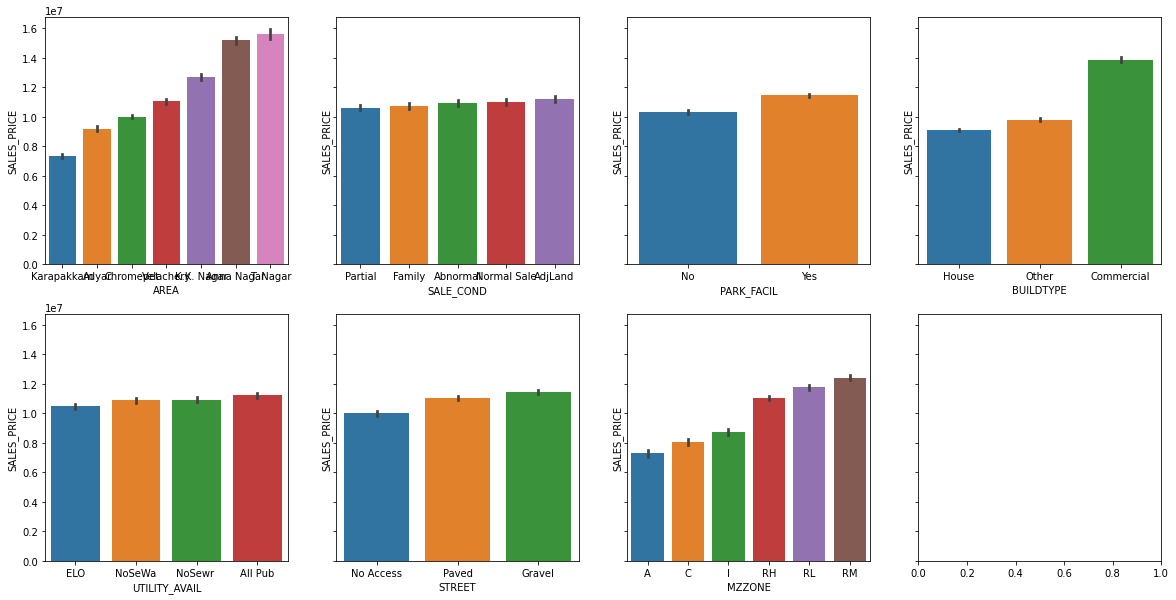

In [288]:
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)


#Area
sns.barplot(ax=axes[0,0], x=df.AREA, y=df.SALES_PRICE, order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

# SALE_COND
sns.barplot(ax=axes[0,1], x=df.SALE_COND, y=df.SALES_PRICE, order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

# PARK_FACIL
sns.barplot(ax=axes[0,2], x=df.PARK_FACIL, y=df.SALES_PRICE, order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

# BUILDTYPE
sns.barplot(ax=axes[0,3], x=df.BUILDTYPE, y=df.SALES_PRICE, order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

# UTILITY_AVAIL
sns.barplot(ax=axes[1,0], x=df.UTILITY_AVAIL, y=df.SALES_PRICE, order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

# STREET
sns.barplot(ax=axes[1,1], x=df.STREET, y=df.SALES_PRICE, order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

# MZZONE
sns.barplot(ax=axes[1,2], x=df.MZZONE, y=df.SALES_PRICE, order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])


Area graph shows a linear relationship, hence label encoding

In [289]:
df.AREA=df.AREA.map({'Karapakkam':1, 'Adyar':2, 'Chromepet':3, 'Velachery':4, 'K.K. Nagar':5, 'Anna Nagar':6, 'T. Nagar':7})

SALE_COND shows a linear relationship, hence label encoding

In [290]:
df.SALE_COND=df.SALE_COND.map({'Partial':1, 'Family':2, 'Abnormal':3, 'Normal Sale':4, 'AdjLand':5})

PARK_FACIL shows a linear relationship, hence label encoding

In [291]:
df.PARK_FACIL=df.PARK_FACIL.map({'Yes':1, 'No':2})

BUILDTYPE shows a non-linear relationship, hence one-hot encoding

In [292]:
b=pd.get_dummies(df.BUILDTYPE).astype(int)

In [293]:
df=df.join(b)

In [294]:
df.drop("BUILDTYPE", axis=1, inplace=True)

UTILITY_AVAIL shows a linear relationship, hence label encoding

In [295]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.map({'ELO':1, 'NoSeWa':2, 'NoSewr ':3, 'All Pub':4})

STREET shows a linear relation, hence label encoding

In [296]:
df.STREET=df.STREET.map({'No Access':1, 'Paved':2, 'Gravel':3})

MZZONE shows a linear relation, hense label encoding

In [297]:
df.MZZONE=df.MZZONE.map({'A':1, 'C':2, 'I':3, 'RH':4, 'RL':5, 'RM':6})

# **Numerical columns**

In [298]:
num

['INT_SQFT',
 'Age',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE']

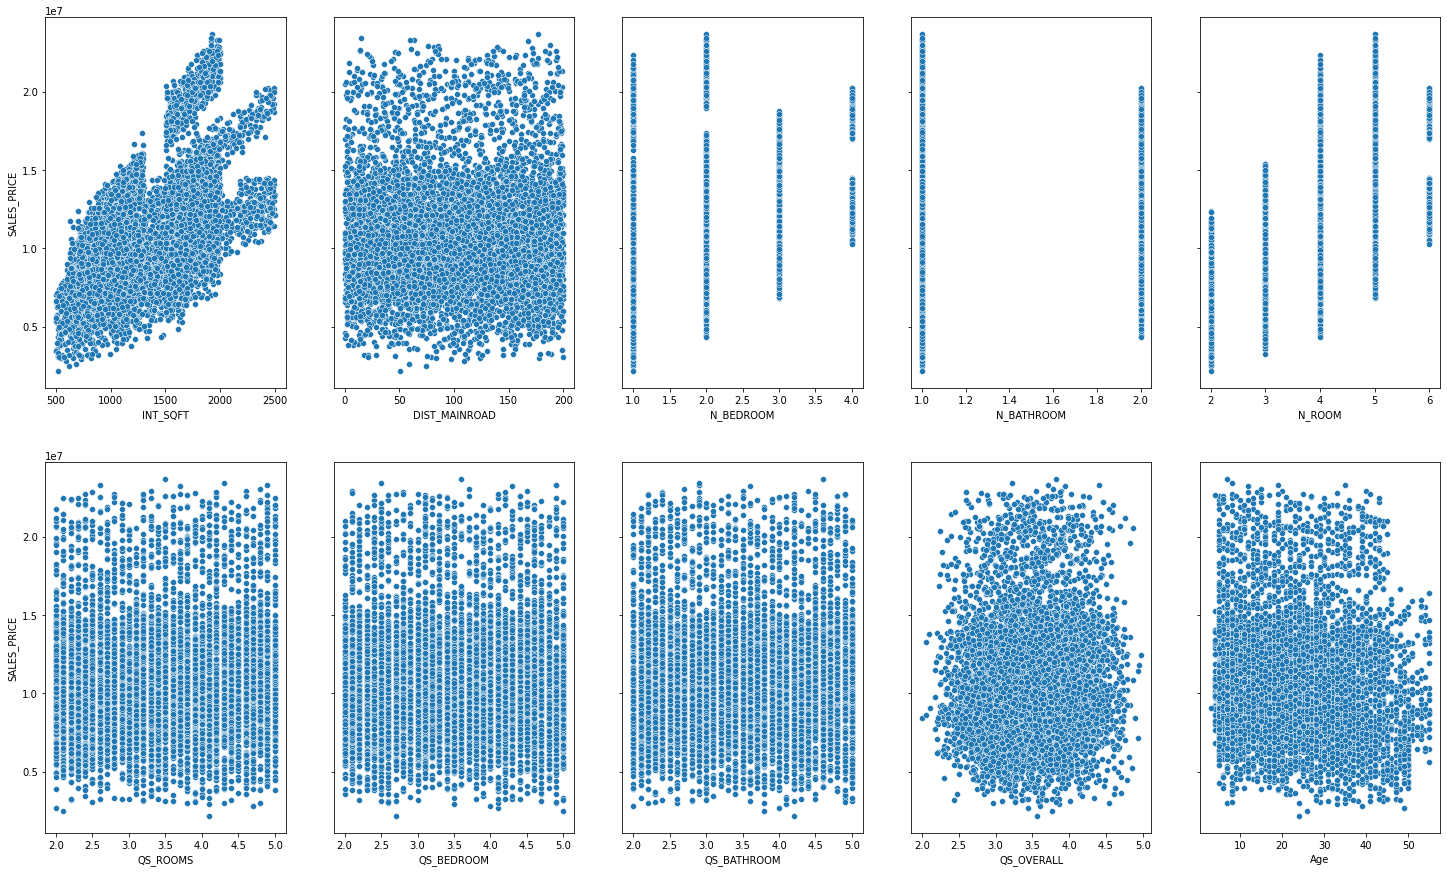

In [299]:
fig, axes = plt.subplots(2, 5, figsize=(25, 15), sharey=True)


#INT_SQFT
sns.scatterplot(ax=axes[0,0], x=df.INT_SQFT, y=df.SALES_PRICE)

# DIST_MAINROAD
sns.scatterplot(ax=axes[0,1], x=df.DIST_MAINROAD, y=df.SALES_PRICE)

# N_BEDROOM
sns.scatterplot(ax=axes[0,2], x=df.N_BEDROOM, y=df.SALES_PRICE)

# N_BATHROOM
sns.scatterplot(ax=axes[0,3], x=df.N_BATHROOM, y=df.SALES_PRICE)

# N_ROOM
sns.scatterplot(ax=axes[0,4], x=df.N_ROOM, y=df.SALES_PRICE)

# QS_ROOMS
sns.scatterplot(ax=axes[1,0], x=df.QS_ROOMS, y=df.SALES_PRICE)

# QS_BEDROOM
sns.scatterplot(ax=axes[1,1], x=df.QS_BEDROOM, y=df.SALES_PRICE)

# QS_BATHROOM
sns.scatterplot(ax=axes[1,2], x=df.QS_BATHROOM, y=df.SALES_PRICE)

# QS_OVERALL
sns.scatterplot(ax=axes[1,3], x=df.QS_OVERALL, y=df.SALES_PRICE)

# Age
sns.scatterplot(ax=axes[1,4], x=df.Age, y=df.SALES_PRICE)


In [300]:
# it can be nferred from the data that DIST_MAINROAD, QS_ROOMS, QS_BATHROOM, QS_BEDROOM has no direct effect on the sales price of the house. becase of which they are deleted

In [301]:
df.drop(["DIST_MAINROAD",'QS_ROOMS','QS_BATHROOM','QS_BEDROOM'], axis=1, inplace=True)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   float64
 2   Age            7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int64  
 4   N_BATHROOM     7109 non-null   int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   UTILITY_AVAIL  7109 non-null   int64  
 9   STREET         7109 non-null   int64  
 10  MZZONE         7109 non-null   int64  
 11  QS_OVERALL     7109 non-null   float64
 12  SALES_PRICE    7109 non-null   int64  
 13  Commercial     7109 non-null   int64  
 14  House          7109 non-null   int64  
 15  Other          7109 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 888.8 KB


# **Fiting The model**

In [303]:
df.columns

Index(['AREA', 'INT_SQFT', 'Age', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_OVERALL', 'SALES_PRICE', 'Commercial', 'House', 'Other'],
      dtype='object')

In [304]:
#Extracting Independent and dependent Variable  
x= df[['AREA', 'INT_SQFT', 'Age', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_OVERALL', 'Commercial', 'House', 'Other']]
y= df['SALES_PRICE']

In [305]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)

# **Multiple linear regression** 

In [306]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [307]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_test)  

In [309]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.93


It can be concluded that the accuracy score is 93%. 